___
# Binary Logistic Regression for Identifying Optimal Customer Characteristics in eCommerce

___

The Leads Dataset is taken from the marketing dataset of X Education, an online education company that sells courses to industry professionals. 

X Education implements marketing for their courses online across several websites and different search engines such as Google, Facebook, and organic search. Users who land on the website can browse through the courses, watch videos, or fill out a form with their information. Thus when the form is filled out, these users become a potential customer. 

The potential customers are then contacted by the sales team via email or phone, and this process is recorded in the data. X Education has noticed that only a small percentage of these leads get converted into actual customers. Typically, less than 1/3 of these prospects become customers. 

In order to make the process more efficient, X Education wants a way to identify customers who have the most potential of converting into a sale utilizing the given data. This will be done by creating a binary logistics regression that predict which class a customer will fall into (Converted or Not Converted) based on the customer characteristics.


The full dataset can be found on Kaggle at [this link](https://www.kaggle.com/ashydv/leads-dataset).

More information on the column values can be found in the data folder under Leads Data Dictionary.

<img src='https://image.freepik.com/free-vector/digital-marketing-funnel-infographic-design_35632-136.jpg'>

# Source the Dataset
___

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0,10.0)

Populating the interactive namespace from numpy and matplotlib


C:\Users\pauli\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [82]:
df = pd.read_csv("data/leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [84]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [85]:
df.shape

(9240, 37)

# Formulate a Hypothesis about the Data
___

The hypothesis of this logistic regression is that there is no relationship between the chosen X variables and the Y variable - 'Converted'.

This hypothesis will later be tested throughout the project. The most optimal outcome is to reject the hypothesis of no relationship, which means the alternative hypothesis will be used instead. If the alternative hypothesis is used, that means there **is** a relationship between the chosen variables and conversion, and a model can be build to identify the variables which are most optimal for conversion.

# Clean the Data
___

### Duplicated Data

First, check for any data that is duplicated. Any duplicated values can be removed because it would create misinformed data.

In [86]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


The are no duplicate values, moving on to the next step of removing NaN values.

## NaN Values

Looking at the dataset, there is a high occurrence of NaN values. For the model and data insights to be more accurate the NaN values will be removed.

Some of the key reasons for removing Nan values are:
- NaN values can change the data metrics of mean or medium values, taking away from the data accuracy.
- Certain sklearn algorithms can't be performed on datasets with NaN values.

In [87]:
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Another thing to keep in mind, is that the value 'Select' is present throughout the data above. This just means that the user did not select an answer, and this value can be treated the same as NaN. 

In [88]:
df = df.replace('Select', np.nan)

A heat map can give a high level visualization of which columns contain missing data.

Text(0.5, 1, 'Amount of NaN Values')

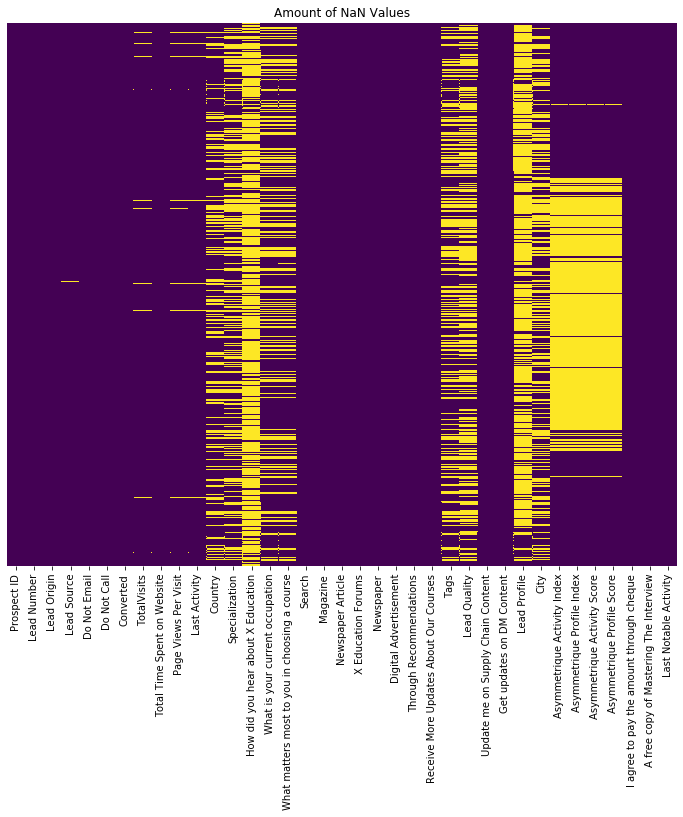

In [89]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.title("Amount of NaN Values")

The above heatmap shows there are many missing values. However, instead of cleaning all the data one by one, it is more efficient to drop columns that will not be used. These are columns that have a large majority of the data missing, or dont contain useful information for the model creation.

In [90]:
def NaNValue(df): return df[df.isnull().any(axis=1)]
NaNValue(df).head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


These are all the columns that contain NaN values:

In [91]:
print(df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

The below columns don't give any useful information for interpretation, so they can be dropped in order to work with a smaller and cleaner dataset.

In [92]:
# Drop all the rest besides: 'Converted', Lead Origin','Lead Source','Do Not Email','Do Not Call','TotalVisits','Total Time Spent on Website','Page Views Per Visit'

df = df.drop(['Prospect ID',
'Lead Number',
'Last Activity',
'Country',
'Specialization',
'How did you hear about X Education',
'What is your current occupation',
'What matters most to you in choosing a course',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Tags',
'Lead Quality',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'Lead Profile',
'City',
'Asymmetrique Activity Index',
'Asymmetrique Profile Index',
'Asymmetrique Activity Score',
'Asymmetrique Profile Score',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview',
'Last Notable Activity'], axis=1)

In [93]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,API,Olark Chat,No,No,0,0.0,0,0.0
1,API,Organic Search,No,No,0,5.0,674,2.5
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0


Now these are the only values missing:

In [94]:
print(df.isnull().sum())

Lead Origin                      0
Lead Source                     36
Do Not Email                     0
Do Not Call                      0
Converted                        0
TotalVisits                    137
Total Time Spent on Website      0
Page Views Per Visit           137
dtype: int64


#### Cleaning 'Lead Source'

In [95]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

Since 'Lead Source' is connected to the source of the selected the advertisement, an average will not be accurate. Instead these NaN values will be dropped.

In [96]:
df = df.dropna(subset=['Lead Source'])

#### Cleaning 'TotalVisits'

Total Visits is numerical, therefore extreme outliers can be replaced with a value, most accurate will be the mean. Below is more information on Total Visits:

In [97]:
print(df['TotalVisits'].unique())

[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]


In [98]:
df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

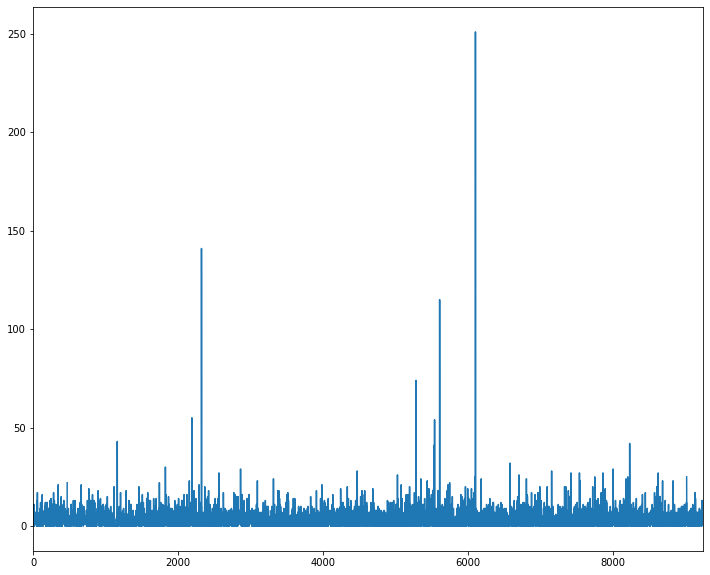

In [99]:
df['TotalVisits'].plot()

There are some obvious outliers in the data. However, it's not clear if this is because the data is incorrect, or there actually were a large number of visits. 
To deal with this case, I will only take the super extreme cases, any value over 50, and change them to the mean in order to keep the data more consistent.


In [100]:
df[df['TotalVisits']>50] 

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00
2322,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71
5283,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33
5538,Landing Page Submission,Referral Sites,No,No,0,54.0,1280,4.50
5608,Landing Page Submission,Referral Sites,Yes,No,0,115.0,187,8.21
6102,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48


In [101]:
df.loc[[2190,2322,5283,5538,5608,6102], 'TotalVisits'] = df['TotalVisits'].mean()
df.loc[[2190,2322,5283,5538,5608,6102]]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,297,55.00
2322,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,755,6.71
5283,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,1209,12.33
5538,Landing Page Submission,Referral Sites,No,No,0,3.456028,1280,4.50
5608,Landing Page Submission,Referral Sites,Yes,No,0,3.456028,187,8.21
6102,Landing Page Submission,Direct Traffic,No,No,1,3.456028,49,1.48


Now we can remove the NaN and view the plot below with the outliers removed:

In [102]:
df = df.dropna(subset=['TotalVisits'])

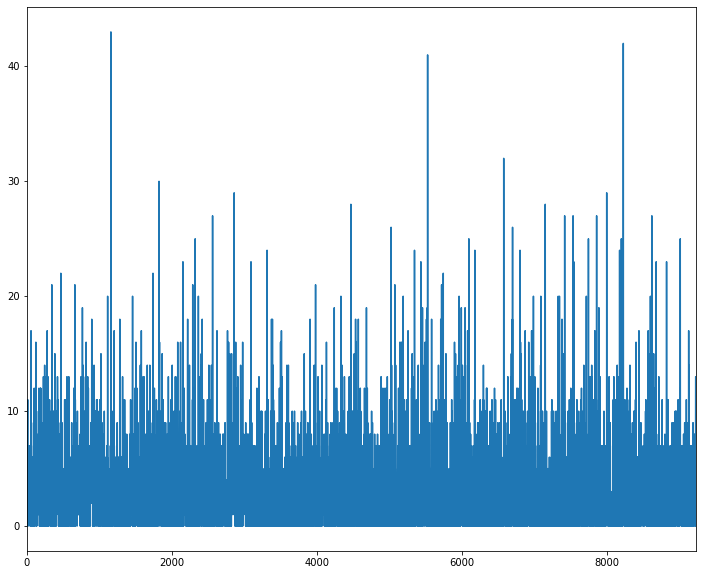

In [103]:
df['TotalVisits'].plot()

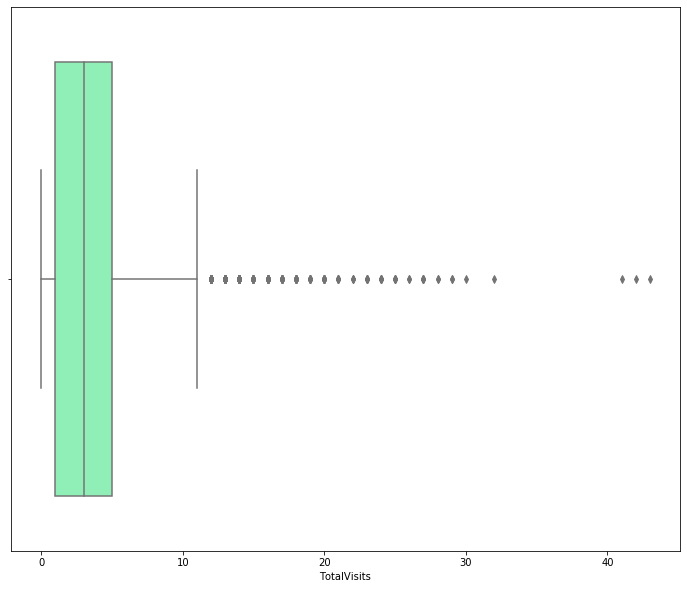

In [104]:
sns.boxplot(x='TotalVisits', data=df, palette='rainbow')

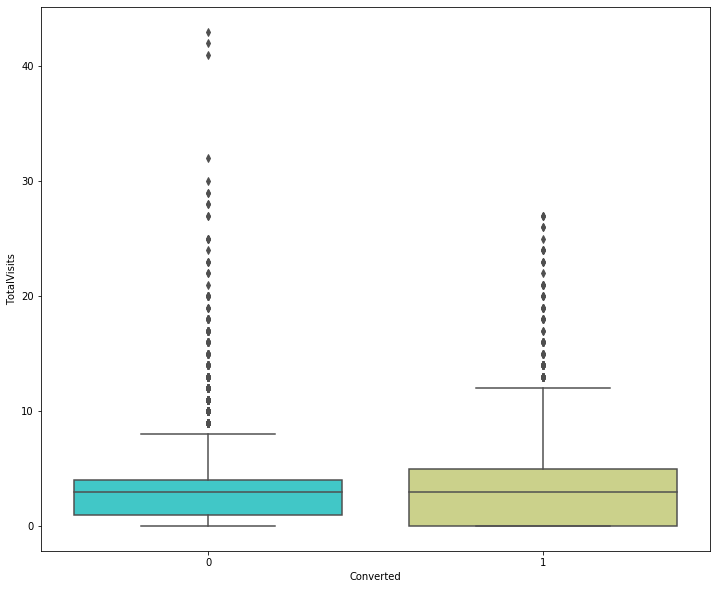

In [105]:
sns.boxplot(y='TotalVisits', x='Converted', data=df, palette='rainbow')

#### Cleaning 'Page Views Per Visit'

Page Views is numerical, therefore extreme outliers can be replaced with a value, most accurate will be the mean. Below is more information on Page Views Per Visit:

In [106]:
print(df['Page Views Per Visit'].unique())

[ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67  4.5   3.33 16.   12.
  1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.    2.25
  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75  2.8
  2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25  6.71
  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6   2.9
  1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21 12.33
  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.    3.75
  6.67  1.54  2.13  2.14  2.45  3.29  4.17  1.63  3.38  1.17 14.5   3.8
  1.19  3.82  2.83  1.93 11.5   2.08]


In [107]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

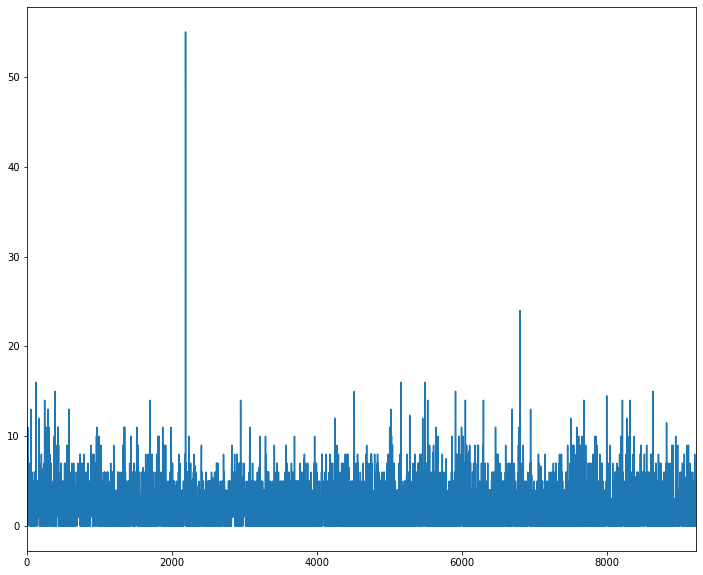

In [108]:
df['Page Views Per Visit'].plot()

There are some extreme outliers. Again, because we can't prove if the data is accurate or not, I will only remove the extreme outliers to ensure the data is accurate, and replace with the average (mean) value. I will also remove the NaN values because they do not add any usable information.

In [109]:
df[df['Page Views Per Visit']>20]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,297,55.0
6805,API,Organic Search,No,No,1,24.000000,1527,24.0


In [110]:
df.loc[[2190,6805], 'Page Views Per Visit'] = df['Page Views Per Visit'].mean()
df.loc[[2190,6805]]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2190,Landing Page Submission,Direct Traffic,Yes,No,0,3.456028,297,2.370151
6805,API,Organic Search,No,No,1,24.000000,1527,2.370151


In [111]:
df = df.dropna(subset=['Page Views Per Visit'])

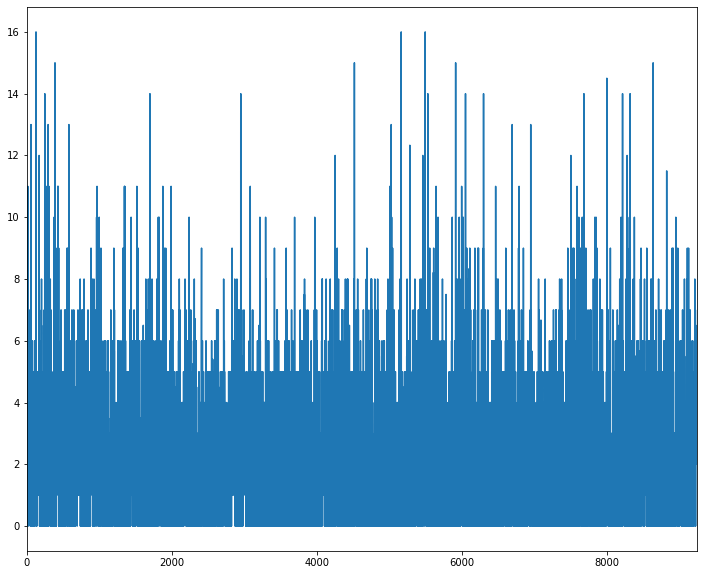

In [112]:
df['Page Views Per Visit'].plot()

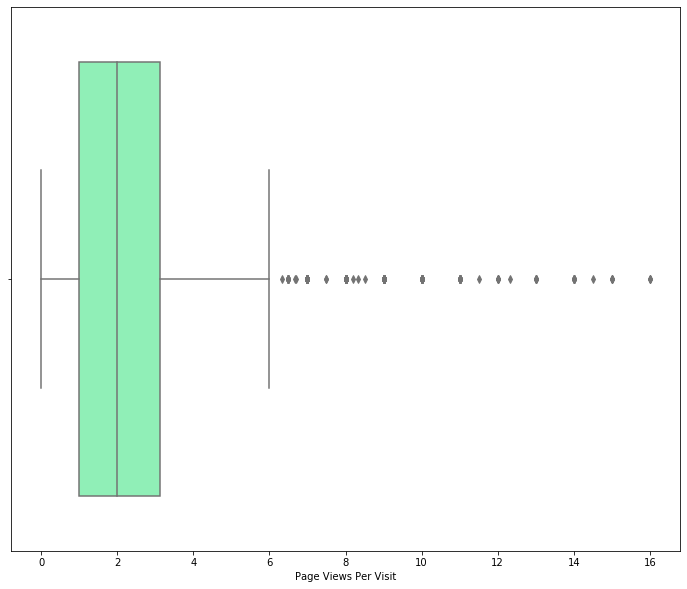

In [113]:
sns.boxplot(x='Page Views Per Visit', data=df, palette='rainbow')

All the NaN values and extreme outliers are gone now.

In [114]:
print(df.isnull().sum())

Lead Origin                    0
Lead Source                    0
Do Not Email                   0
Do Not Call                    0
Converted                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64


Text(0.5, 1, 'Amount of NaN Values')

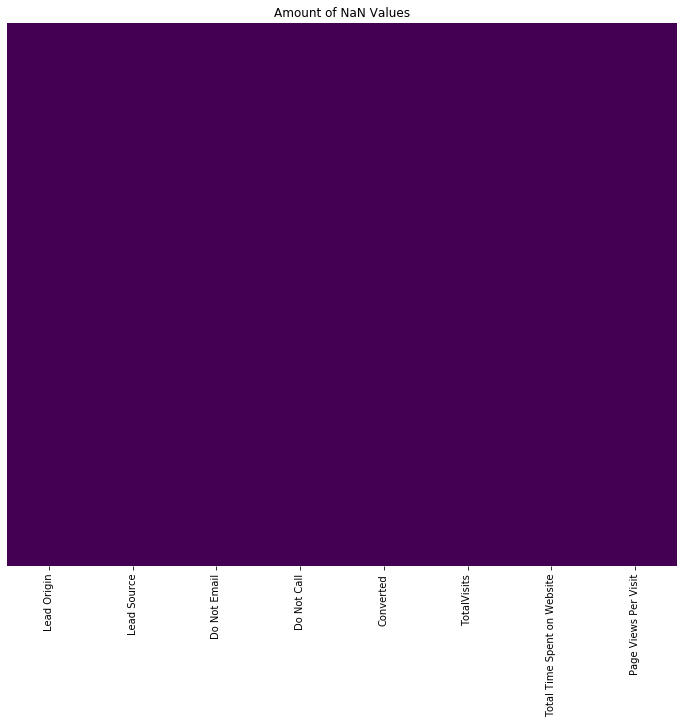

In [115]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.title("Amount of NaN Values")

# Exploritory Data Analysis & Visuals
___

### Correlation of the Data

In [116]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.045951,0.359261,0.000980
TotalVisits,0.045951,1.000000,0.306000,0.661902
Total Time Spent on Website,0.359261,0.306000,1.000000,0.330016
Page Views Per Visit,0.000980,0.661902,0.330016,1.000000


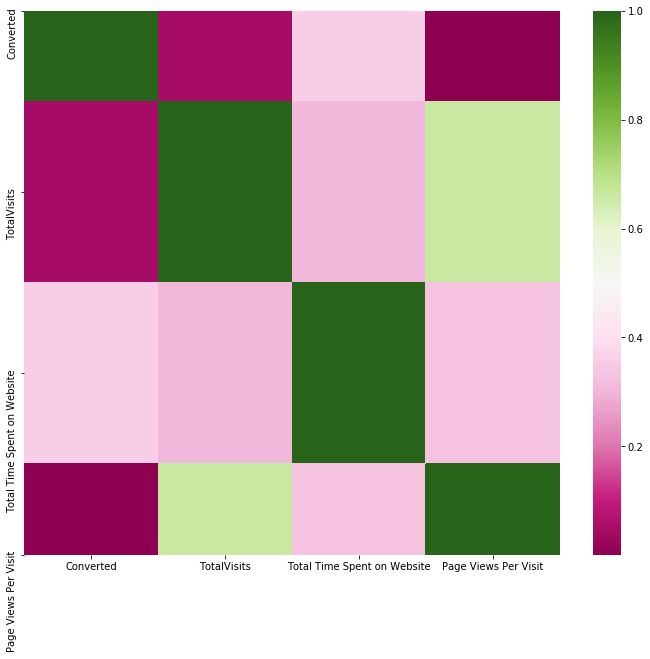

In [117]:
sns.heatmap(data=df.corr(), cmap="PiYG")

### Plotting and Relationships

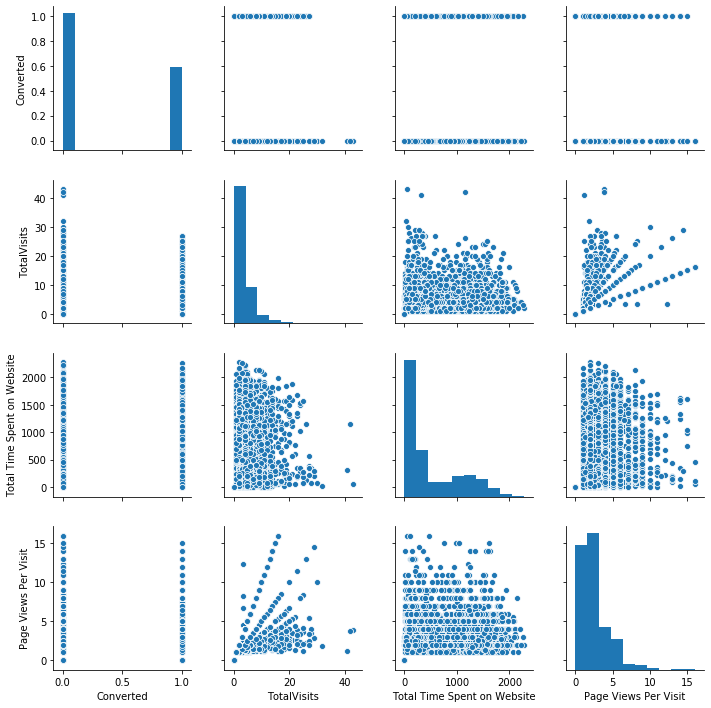

In [118]:
sns.pairplot(df)

Some of a values we want to explore more are TotalVisits, Total Time Spend on Website, and Lead Source. These values all seem to have an impact on Converted.

#### Total Visits and Total Time Spent on Website Relationships

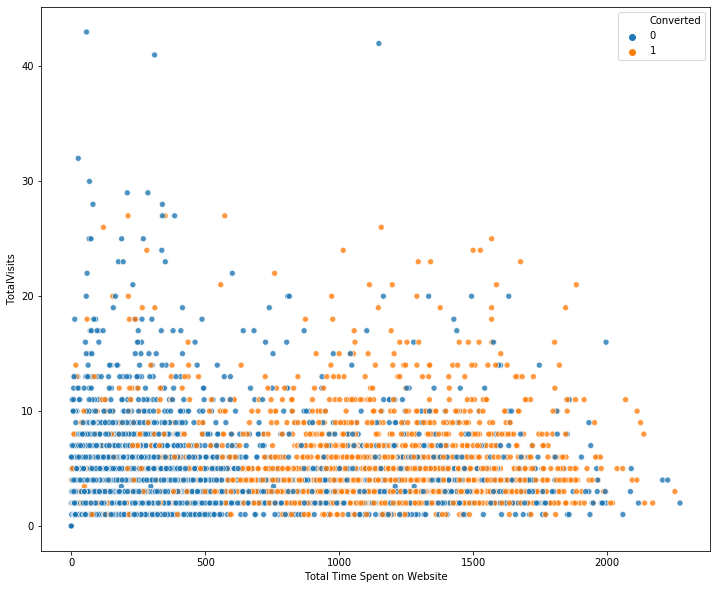

In [119]:
sns.scatterplot(data=df, y='TotalVisits', x='Total Time Spent on Website', hue='Converted', alpha=0.8)

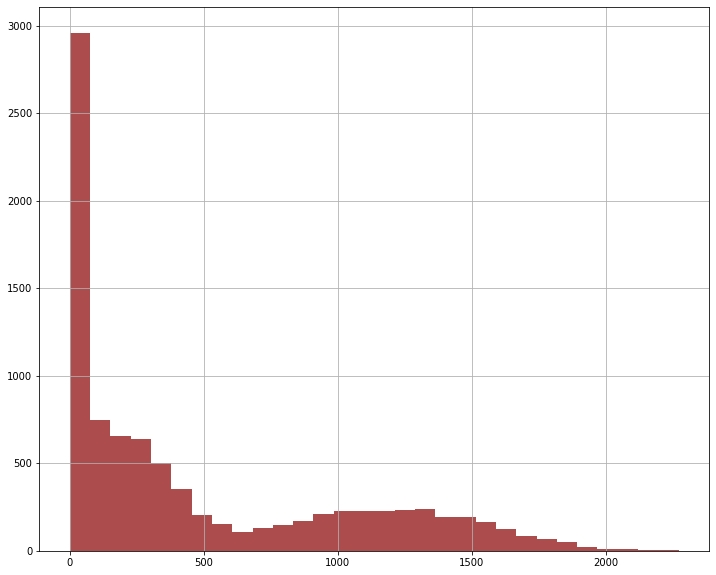

In [120]:
df['Total Time Spent on Website'].hist(bins=30,color='darkred', alpha=0.7)

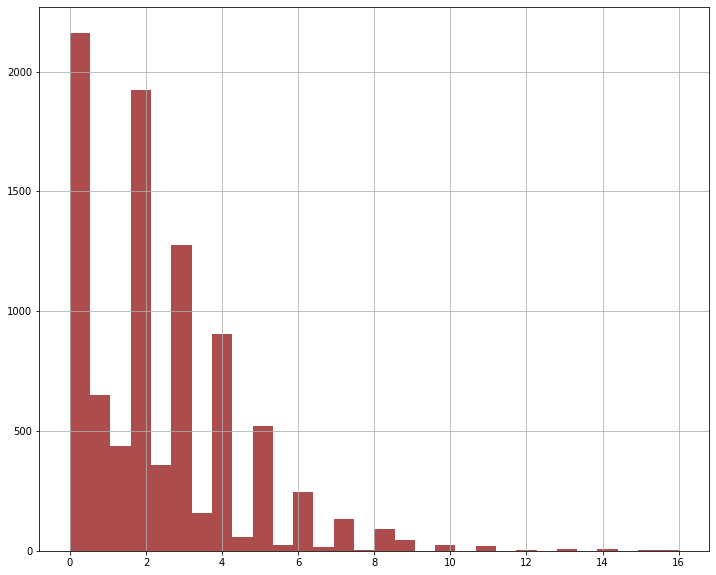

In [121]:
df['Page Views Per Visit'].hist(bins=30,color='darkred',alpha=0.7)

#### Do Not Email and Do Not Call Relationships

It seems like whether the user chooses Yes or No to Emails/Calls, does not dictate whether they will be converted or not.

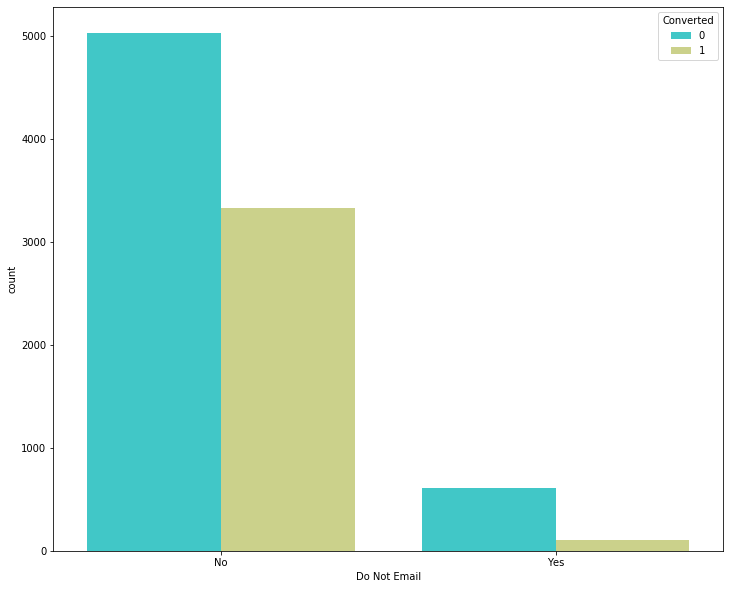

In [122]:
sns.countplot(x='Do Not Email', data=df, hue='Converted', palette='rainbow')

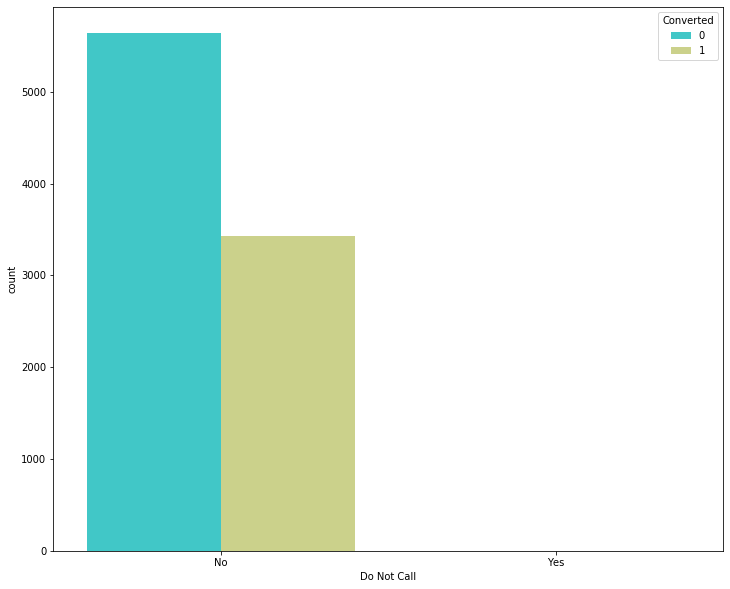

In [123]:
sns.countplot(x='Do Not Call', data=df, hue='Converted', palette='rainbow')

#### Lead Sources Relationships

A majority of the leads that are turned into conversions comes from the top 4 sources - Google, Direct Traffic, Olark Chat, and Organic Search.

In [124]:
# Top Lead Sources

GroupedLeadSource = df.groupby('Lead Source')
GroupedLeadSource.agg(sum).sort_values(by='Converted', inplace=True)
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
testone                 1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

This is a more detailed view of the Top 5 Lead Sources for Conversion

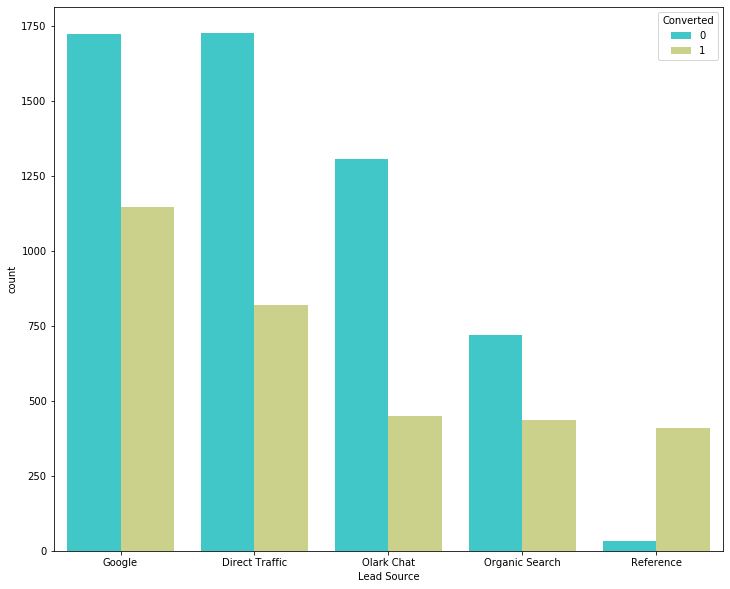

In [125]:
sns.countplot(data=df, x="Lead Source", hue="Converted", palette='rainbow', order=pd.value_counts(df['Lead Source']).iloc[:5].index)

# Create a Model - Logistics Regression
___

### Classifying Categorical Data

First, I'll need to map the values to a binary value. The columns 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call' will all need to be mapped

In [126]:
print(df['Lead Origin'].unique(), '\n')
print(df['Lead Source'].unique(), '\n')
print(df['Do Not Email'].unique(), '\n')
print(df['Do Not Call'].unique(), '\n')

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'] 

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

['No' 'Yes'] 

['No' 'Yes'] 



In [127]:
df['Lead Origin'] = df['Lead Origin'].map({'API':0, 'Landing Page Submission':1, 'Lead Add Form':2, 'Lead Import':3,'Quick Add Form':4})

In [128]:
df['Lead Source'] = df['Lead Source'].map({'Olark Chat':0, 'Organic Search':1, 'Direct Traffic':2, 'Google':3, 'Referral Sites':4, 'Welingak Website':5, 'Reference':6, 
'google':7, 'Facebook':8, 'blog':9, 'Pay per Click Ads':10, 'bing':11, 'Social Media':12, 'WeLearn':13, 'Click2call':14, 'Live Chat':15, 'welearnblog_Home':16, 'youtubechannel':17,
'testone':18, 'Press_Release':19, 'NC_EDM':20})

In [129]:
df['Do Not Email'] = df['Do Not Email'].map({'No':0, 'Yes':1})

In [130]:
df['Do Not Call'] = df['Do Not Call'].map({'No':0, 'Yes':1})

The below values, 'TotalVisits', 'Total Time Spend on Website', and 'Page Views Per Visit' are numerical so they can be kept as is.

In [131]:
print('TotalVisits:', df['TotalVisits'].unique(), '\n') 
print('Total Time Spent on Website:', df['Total Time Spent on Website'].unique(), '\n')
print('Page Views Per Visit:', df['Page Views Per Visit'].unique(), '\n')

TotalVisits: [ 0.          5.          2.          1.          4.          8.
 11.          6.          3.          7.         13.         17.
  9.         12.         10.         16.         14.         21.
 15.         22.         19.         18.         20.         43.
 30.         23.          3.45602821 25.         27.         29.
 24.         28.         26.         41.         32.         42.        ] 

Total Time Spent on Website: [   0  674 1532 ...  603  483  927] 

Page Views Per Visit: [ 0.          2.5         2.          1.          4.          8.
  2.67       11.          5.          6.          3.          1.33
  1.5         3.5         7.          2.33       13.          8.5
  5.5         1.67        4.5         3.33       16.         12.
  1.71        1.8         6.5         4.33       14.          3.4
 10.          1.25        1.75        2.63       15.          2.25
  3.67        1.43        9.          2.6         4.75        1.27
  3.25        5.33        2.57    

### Training Data Using Sklearn

The Dataset is broken into two parts, data for model training and data for the model testing.

In [132]:
feature_cols = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X = df[feature_cols] # This is the features we have
y = df.Converted # This is the target variable

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [134]:
# P-Value Testing

x = df[feature_cols] 
stats.shapiro(x) 

C:\Users\pauli\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.28858333826065063, 0.0)

# Validation Techniques
___

An overview of the Accuracy Score, Test Data, Training Data, and Confusion Matrix:

In [135]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection,metrics, linear_model, datasets, feature_selection, tree
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# instantiate the model using the default parameters
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\pauli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [136]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.7699427060379022


In [137]:
np.sum(y_test)

802

In [138]:
np.sum(y_pred)

676

In [139]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1269,  198],
       [ 324,  478]], dtype=int64)

Text(0.5, 637.6, 'Predicted label')

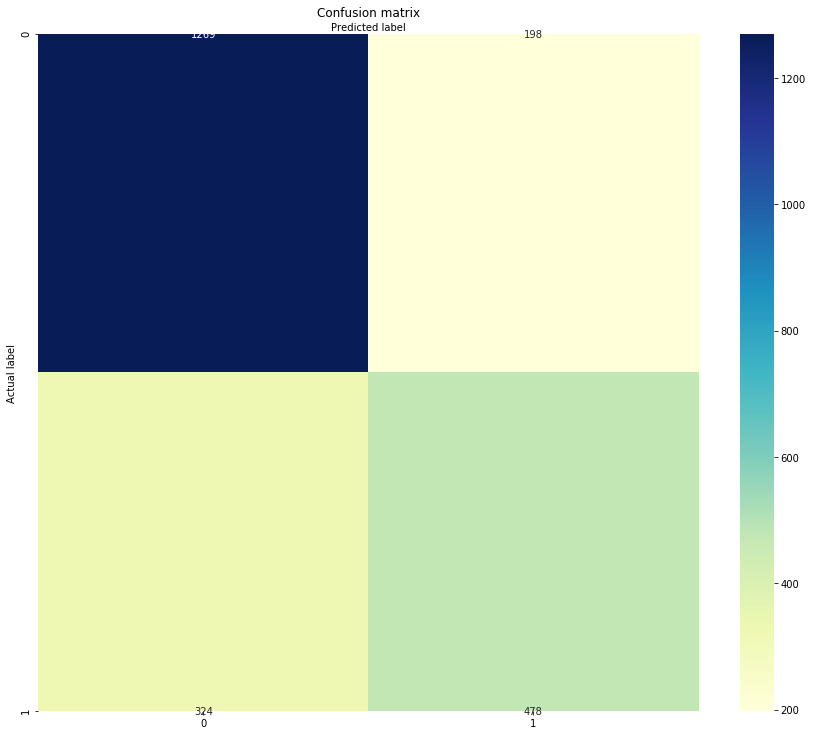

In [140]:
matrix=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(matrix))
plt.xticks(tick_marks, matrix)
plt.yticks(tick_marks, matrix)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model Selection KFold

In order to validate, the data can split into sections to train and split multiple times for a different selection of testing and training data using the KFold method. The dataset is divided into 4 subsets of equal size.

In [141]:
kf = model_selection.KFold(n_splits=4, shuffle=True)
for train, test in kf.split(df):
    print(train,test)

[   1    3    5 ... 9071 9072 9073] [   0    2    4 ... 9047 9062 9063]
[   0    2    3 ... 9069 9070 9073] [   1    8   10 ... 9068 9071 9072]
[   0    1    2 ... 9070 9071 9072] [   3    5    7 ... 9060 9061 9073]
[   0    1    2 ... 9071 9072 9073] [  22   24   27 ... 9066 9069 9070]


In [142]:
set1, set2, set3, set4 = kf.split(df)

In [143]:
set1

(array([   0,    1,    2, ..., 9070, 9071, 9072]),
 array([   9,   14,   16, ..., 9061, 9065, 9073]))

In [144]:
df_train1 = df.iloc[set1[0],:]
df_test1 = df.iloc[set1[1],:]
df_test1

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
9,0,3,0,0,0,4.0,58,4.00
14,1,2,1,0,0,1.0,481,1.00
16,0,0,0,0,0,0.0,0,0.00
24,0,3,0,0,1,6.0,1137,1.50
33,0,1,0,0,0,3.0,74,1.50
...,...,...,...,...,...,...,...,...
9225,1,2,1,0,0,2.0,74,2.00
9226,0,0,0,0,0,0.0,0,0.00
9227,1,3,0,0,1,5.0,1283,1.67
9231,1,3,0,0,1,8.0,1016,4.00


### Model Predictions

In [148]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\pauli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
predictions = logmodel.predict(X_test)

In [151]:
from sklearn.metrics import classification_report

# Create a classification report for the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1467
           1       0.71      0.60      0.65       802

    accuracy                           0.77      2269
   macro avg       0.75      0.73      0.74      2269
weighted avg       0.76      0.77      0.76      2269



### Mean Absolute Error (MAE)

In [156]:
from sklearn import metrics

The Mean Absolute Error (MAE) is a measure of errors between paired observations. An average of the absolute errors.

<img src='https://miro.medium.com/max/473/1*OVlFLnMwHDx08PHzqlBDag.gif'>

In [161]:
metrics.mean_absolute_error(y_test, predictions)

0.23005729396209784

### Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a measure of the average of the squares of the errors. The average squared difference between the estimated values and the actual value.

<img src='https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG' width='320px'>

In [154]:
metrics.mean_squared_error(y_test, predictions)

0.23005729396209784

### Root Mean Square Error (RMSE)

The Root Mean Square Error (RMSE) is a measure of the differences between values predicted by a model and the values observed.

<img src='https://miro.medium.com/max/491/1*9hQVcasuwx5ddq_s3MFCyw.gif'>

In [155]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.47964288169647407

Overall the lower value of the MAE, MSE, RMSE indicates a better fit in terms of model prediction and response.

# Conclusion
___

In order for X Education to operate more efficiently and increase conversion, it makes sense to focus on the values that increase sales. This model serves as a purpose for businesses to identify where their main focus and resources should be allocated to in order to most optimally convert a lead into a customer.


Key Model Takeaways:

| Data                     | Description                                                                                                                       |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Sales Conversions        | Most priority in selecting customers to target should be those the display the highest 'Higher Total Time Spent on Website' and 'Total Visits'. These characteristics have indicated to lead to higher amount of conversions.                                                                |
| Lead Sources             | Lead sources with higher conversions are Google, Direct Traffic, Olark Chat, and Organic Search. Customers accessing the website from these lead sources should be prioritized. Alternatively, the company can explore new lead sources and compare those conversions to the current top lead sources. There can be undiscovered sources such as Facebook Ads or SMS Push N                                  |
| Communication Indicators | Customers who selected 'Do Not Email' and 'Do Not Call' are not a high indicator on the probability of converting into sale. Therefore customers who have selected these values they should still be targeted with online ads and it is important not to miss this large subset of customers as potential conversions.   |
